## 2.1. Limpieza y manipulación de datos para modelos de clasifiacación

Como hemos concluido en el apartado anterior, tras intentar generar modelos de regresión, hemos llegado a la conclusión que el set de datos no era el adecuado para alcanzar los propósitos que esperábamos. De este modo, trataremos en este apartado de generar un nuevo set de datos, combinando tantos datos 'originales' como datos 'sintéticos' que nosotros mismos genéraremos de manera aleatoria. 

En definitiva, el nuevo propósito de este proyecto consistirá en desarrollar 4 modelos de clasificación que, en base a una serie de características, nos ayuden a predecir la variable objetivo relacionada con el tipo de posición dentro del ámbito del 'DATA'.

Dado que en el primer apartado '1.1. Análisis Exploratorio de datos - (Regresión).ipynb' conocimos en detalle cómo era nuestro set de datos orignal y definimos una serie de acciones que desarrollamos en el siguiente apartado '1.2. Limpieza y manipulación de datos - (Regresión).ipynb', en este caso, definiremos directamente las acciones a realizar para obtener un set de datos acorde que nos permita entrenar nuestros modelos de clasificación.

In [1]:
#Librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Se importa el set de datos
job_positions = pd.read_csv('./dataset/Cleaned_DS_Jobs.csv')

##### Situación inicial de nuestro set de datos.

In [3]:
job_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

#### Acción 1: Generar nuestra variable objetivo 'job_desc'

En base a la columna original 'Job Title', donde teníamos toda la información de la oferta de trabajo, generaremos una nueva variable, clasificando los puestos de trabajo en categorías según el texto original. Para la definición de categorías, utilizaremos dos funciones que unificaremos después en función del tipo de puesto y del nivel de experiencia.

In [4]:
#Definimos dos funciones que nos permitirán crear nuestra variable objetivo
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    if 'data science software engineer' in title.lower():
        return 'data engineer'
    elif 'software engineer - data science' in title.lower():
        return 'data engineer'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'statistical scientist' in title.lower():
        return 'data scientist'
    elif 'ai scientist' in title.lower():
        return 'data scientist'
    elif 'software' in title.lower():
        return 'data engineer'
    elif 'data modeler' in title.lower():
        return 'data engineer'
    elif 'modeling engineer' in title.lower():
        return 'data engineer'
    elif 'data architect' in title.lower():
        return 'data engineer'
    elif 'engineering scientist' in title.lower():
        return 'data engineer'
    elif 'analytical' in title.lower():
        return 'data analyst'
    elif 'analytics' in title.lower():
        return 'data analyst'
    elif 'computer' in title.lower():
        return 'computer scientist'
    elif 'computational' in title.lower():
        return 'computer scientist'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    elif 'manager' in title.lower() in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

#### Categoría profesional

In [5]:
job_positions['job_description']  = job_positions['Job Title'].apply(title_simplifier)

job_positions.job_description.value_counts()

job_description
data scientist        460
data analyst           63
data engineer          59
ml engineer            34
na                     30
computer scientist     14
Name: count, dtype: int64

Observamos las ofertas de trabajo que no han entrado dentro de las categorías.

In [6]:
job_positions[job_positions['job_description'] == 'na']['Job Title'].value_counts()

Job Title
Decision Scientist                                                                          3
Scientist / Group Lead, Cancer Biology                                                      2
Senior Scientist - Toxicologist - Product Integrity (Stewardship)                           2
Weapons and Sensors Engineer/Scientist                                                      2
Research Scientist - Patient-Centered Research (Remote)                                     2
Medical Lab Scientist                                                                       1
Development Scientist, Voltaren                                                             1
Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics                            1
Vice President, Biometrics and Clinical Data Management                                     1
Scientist/Research Associate-Metabolic Engineering                                          1
Manager, Field Application Scientist, Southeast   

Oservamos que el resto de 'na' en job_simp son posiciones de trabajo que no pertenecen al mundo del data, por lo que procedemos a eliminarlas de nuestro set de datos.

In [7]:
job_positions = job_positions[job_positions['job_description'] != 'na']

In [8]:
job_positions.job_description.value_counts()

job_description
data scientist        460
data analyst           63
data engineer          59
ml engineer            34
computer scientist     14
Name: count, dtype: int64

#### Nivel experiencia

Aplicamos la funcion definida anteriormente a nuestro set de datos.

In [9]:
job_positions['experience'] = job_positions['Job Title'].apply(seniority)

job_positions.experience.value_counts()

experience
na          538
senior       85
manager       5
junior        1
director      1
Name: count, dtype: int64

#### Función que combina ambas características

In [10]:
# Definimos la función
def generate_job_desc(row):
    job_desc = row['job_description']
    exp = row['experience']
    
    if job_desc == 'data analyst':
        if exp == 'junior':
            return 'junior data analyst'
        elif exp == 'senior':
            return 'senior data analyst'
        elif exp == 'manager':
            return 'manager data analyst'
        elif exp == 'director':
            return 'director data analyst'
        elif exp == 'na':
            return 'data analyst'
    elif job_desc == 'data engineer':
        if exp == 'junior':
            return 'junior data engineer'
        elif exp == 'senior':
            return 'senior data engineer'
        elif exp == 'manager':
            return 'manager data engineer'
        elif exp == 'director':
            return 'director data engineer'
        elif exp == 'na':
            return 'data engineer'
    elif job_desc == 'data scientist':
        if exp == 'junior':
            return 'junior data scientist'
        elif exp == 'senior':
            return 'senior data scientist'
        elif exp == 'manager':
            return 'manager data scientist'
        elif exp == 'director':
            return 'director data scientist'
        elif exp == 'na':
            return 'data scientist'
    elif job_desc == 'ml engineer':
        if exp == 'junior':
            return 'junior ml engineer'
        elif exp == 'senior':
            return 'senior ml engineer'
        elif exp == 'manager':
            return 'manager ml engineer'
        elif exp == 'director':
            return 'director ml engineer'
        elif exp == 'na':
            return 'ml engineer'
    elif job_desc == 'computer scientist':
        if exp == 'junior':
            return 'junior computer scientist'
        elif exp == 'senior':
            return 'seniorcomputer scientist'
        elif exp == 'manager':
            return 'manager computer scientist'
        elif exp == 'director':
            return 'director computer scientist'
        elif exp == 'na':
            return 'computer scientist'
    
    # Else
    return 'unknown job description'


In [11]:
# Aplicar la función al DataFrame para crear la nueva columna
job_positions['job_desc'] = job_positions.apply(generate_job_desc, axis=1)

job_positions.job_desc.value_counts()

job_desc
data scientist             407
data engineer               53
senior data scientist       50
data analyst                39
ml engineer                 25
senior data analyst         20
computer scientist          14
senior ml engineer           9
senior data engineer         6
manager data analyst         3
manager data scientist       2
junior data analyst          1
director data scientist      1
Name: count, dtype: int64

#### Eliminamos los registros inferiores a 9 para quedarnos con las categorías más representadas.

In [12]:
job_positions = job_positions[job_positions.groupby('job_desc')['job_desc'].transform('count') >= 9]


Categorías con las que trabajaremos y trateremos de predecir con modelos de clasifiación.

In [13]:
job_positions.job_desc.value_counts()

job_desc
data scientist           407
data engineer             53
senior data scientist     50
data analyst              39
ml engineer               25
senior data analyst       20
computer scientist        14
senior ml engineer         9
Name: count, dtype: int64

In [14]:
#Se ajustan las impresiones de columnas y filas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

#### Acción 2: Corregir los -1 de la columna 'Size' como 'Unknown'

Recategorizamos -1 como 'Unknown'.

In [15]:
job_positions['Size'] = job_positions['Size'].apply(lambda x: 'Unknown' if x == '-1' else x)

Resultado:

In [16]:
job_positions['Size'].value_counts()

Size
51 to 200 employees        121
1001 to 5000 employees      98
1 to 50 employees           83
10000+ employees            77
201 to 500 employees        76
501 to 1000 employees       67
5001 to 10000 employees     54
Unknown                     41
Name: count, dtype: int64

#### Acción 3: Corregir los -1 de la columna 'Type of ownership'  y reorganizar valores para tener menos columnas

Creamos una lista con las etiquetas que reclasificaremos como 'Others'.

In [17]:
list_others =('-1','Other Organization','Unknown','College / University','Self-employed','Contract','Hospital')

Definimos una función para corregir los errores.

In [18]:
def map_ownership(x):
    if x == 'Private Practice / Firm':
        return 'Company - Private'
    elif x in list_others:
        return 'Others'
    else:
        return x

job_positions['Type of ownership'] = job_positions['Type of ownership'].apply(map_ownership)

Imprimimos el resultado

In [19]:
job_positions['Type of ownership'].value_counts()

Type of ownership
Company - Private                 369
Company - Public                  143
Others                             41
Nonprofit Organization             30
Subsidiary or Business Segment     25
Government                          9
Name: count, dtype: int64

#### Acción 4:  Modificar el valor -1 de la columna 'Sector' por 'Unknown'.

Se realizan los cambios.

In [20]:
job_positions['Sector'] = job_positions['Sector'].apply(lambda x: 'Unknown' if x == '-1' else x)

Se imprime el resultado.

In [21]:
job_positions['Sector'].value_counts()

Sector
Information Technology                174
Business Services                     115
Unknown                                67
Biotech & Pharmaceuticals              51
Aerospace & Defense                    41
Insurance                              32
Finance                                29
Manufacturing                          21
Government                             16
Health Care                            16
Oil, Gas, Energy & Utilities           10
Telecommunications                      7
Retail                                  7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: count, dtype: int64

Eliminamos los registros por sector inferiores a 10.

In [22]:
job_positions = job_positions[job_positions.groupby('Sector')['Sector'].transform('count') >= 10]

Mostramos resultados de 'Sector'.

In [23]:
job_positions['Sector'].value_counts()

Sector
Information Technology          174
Business Services               115
Unknown                          67
Biotech & Pharmaceuticals        51
Aerospace & Defense              41
Insurance                        32
Finance                          29
Manufacturing                    21
Government                       16
Health Care                      16
Oil, Gas, Energy & Utilities     10
Name: count, dtype: int64

#### Acción 5: Modificaremos el valor -1 por 'Unknown' para la variable 'Revenue'

Se realizan los cambios.

In [24]:
job_positions['Revenue'] = job_positions['Revenue'].apply(lambda x: 'Unknown / Non-Applicable' if x == '-1' else x)

Se imprime el resultado.

In [25]:
job_positions['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            199
$100 to $500 million (USD)           79
$10+ billion (USD)                   56
$10 to $25 million (USD)             40
$2 to $5 billion (USD)               37
$25 to $50 million (USD)             32
$1 to $5 million (USD)               31
$1 to $2 billion (USD)               27
$50 to $100 million (USD)            26
$500 million to $1 billion (USD)     17
$5 to $10 million (USD)              12
$5 to $10 billion (USD)               8
Less than $1 million (USD)            8
Name: count, dtype: int64

#### Acción 6: Cambiar el valor -1 de la columna 'company_age' a 1.

Se realizan los cambios.

In [26]:
job_positions['company_age'] = job_positions['company_age'].apply(lambda x: 1 if x == -1 else x)

Se imprime el resultado.

In [27]:
job_positions['company_age'].value_counts()

company_age
1      108
8       32
21      22
10      21
9       18
24      17
5       16
20      15
14      14
17      13
12      13
11      11
4       11
107     10
15       9
28       8
7        8
73       8
19       7
2        7
22       7
25       6
26       6
38       6
44       6
23       6
34       6
18       6
6        6
109      5
16       5
169      5
52       5
13       5
87       4
39       4
62       4
37       4
35       4
47       4
53       4
32       3
66       3
72       3
30       3
55       3
3        3
31       3
69       3
95       3
42       3
54       3
167      3
40       2
46       2
33       2
103      2
133      2
102      2
50       2
112      2
27       2
170      2
75       2
74       2
239      2
51       2
57       2
49       2
108      2
106      1
94       1
171      1
124      1
122      1
43       1
160      1
48       1
190      1
157      1
36       1
61       1
67       1
81       1
232      1
60       1
126      1
88       1
68       1
200      

#### Acción 7: Eliminar columnas

Creamos una lista con las columnas a eliminar

In [28]:
columnas_eliminar = ['Job Title','Salary Estimate','min_salary','max_salary','Job Description','Rating','Company Name','Industry','seniority','tableau','Location','Headquarters','job_state','same_state','python','excel','hadoop','spark','aws','big_data','job_simp','job_description','experience']

Eliminamos las columnas de nuestro set de datos

In [29]:
job_positions = job_positions.drop(columns=columnas_eliminar)

In [30]:
job_positions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 659
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Size               572 non-null    object
 1   Type of ownership  572 non-null    object
 2   Sector             572 non-null    object
 3   Revenue            572 non-null    object
 4   avg_salary         572 non-null    int64 
 5   company_age        572 non-null    int64 
 6   job_desc           572 non-null    object
dtypes: int64(2), object(5)
memory usage: 35.8+ KB


#### Acción 8: Crear nuevas columnas de habilidades en base a años de experiencia

Para tener un set de datos que nos sea útil en la creación de un modelo de predicción de clasificación, generaremos datos sintéticos con el valor de las variables sobre habilidades. Originalmente, son varibales binarias, marcadas con '1' si en la oferta de trabajo se requiere de dicha habilidad y con '0' si no se menciona en la oferta. 

Por lo tanto, realizaremos una transformación de dichas habilidades con valores aleatorios según los años de experienca que, por cada categoría de 'job_desc' se puede requerir en el mercado laboral.

A continuación, mostraremos una tabla que hemos generado con la ayuda de Chat GPT, sobre los años de experiencia que se suelen pedir sobre cada 'skill' por cada categoría de trabajo.

In [31]:
from IPython.display import display

# Crear un diccionario con los datos
experience_data = {
    'Job Position': [
        'Data Scientist', 'Data Engineer', 'Senior Data Scientist',
        'Data Analyst', 'ML Engineer', 'Senior Data Analyst',
        'Computer Scientist', 'Senior ML Engineer'
    ],
    'Python': ['3-5 años', '2-4 años', '5-7 años', '1-3 años', '3-5 años', '3-5 años', '2-4 años', '5-7 años'],
    'Excel': ['2-4 años', '1-2 años', '4-6 años', '2-4 años', '1-2 años', '4-6 años', '1-2 años', '1-2 años'],
    'Hadoop': ['1-2 años', '2-4 años', '3-5 años', '0-1 años', '2-3 años', '1-2 años', '2-3 años', '3-5 años'],
    'Spark': ['1-3 años', '2-4 años', '3-5 años', '0-1 años', '2-4 años', '1-2 años', '2-3 años', '3-5 años'],
    'AWS': ['1-3 años', '2-4 años', '3-5 años', '0-1 años', '2-4 años', '1-2 años', '2-3 años', '3-5 años'],
    'BI Tools': ['1-2 años', '1-2 años', '2-4 años', '2-4 años', '1-2 años', '3-5 años', '1-2 años', '2-3 años'],
    'SQL': ['2-4 años', '3-5 años', '4-6 años', '2-4 años', '2-4 años', '4-6 años', '2-4 años', '3-5 años'],
    'Git': ['1-3 años', '2-4 años', '3-5 años', '1-2 años', '2-4 años', '2-4 años', '2-4 años', '3-5 años'],
}

# Mostrar la tabla con formato
display(pd.DataFrame(experience_data))

,Job Position,Python,Excel,Hadoop,Spark,AWS,BI Tools,SQL,Git
0,Data Scientist,3-5 años,2-4 años,1-2 años,1-3 años,1-3 años,1-2 años,2-4 años,1-3 años
1,Data Engineer,2-4 años,1-2 años,2-4 años,2-4 años,2-4 años,1-2 años,3-5 años,2-4 años
2,Senior Data Scientist,5-7 años,4-6 años,3-5 años,3-5 años,3-5 años,2-4 años,4-6 años,3-5 años
3,Data Analyst,1-3 años,2-4 años,0-1 años,0-1 años,0-1 años,2-4 años,2-4 años,1-2 años
4,ML Engineer,3-5 años,1-2 años,2-3 años,2-4 años,2-4 años,1-2 años,2-4 años,2-4 años
5,Senior Data Analyst,3-5 años,4-6 años,1-2 años,1-2 años,1-2 años,3-5 años,4-6 años,2-4 años
6,Computer Scientist,2-4 años,1-2 años,2-3 años,2-3 años,2-3 años,1-2 años,2-4 años,2-4 años
7,Senior ML Engineer,5-7 años,1-2 años,3-5 años,3-5 años,3-5 años,2-3 años,3-5 años,3-5 años


A continuación, vamos a generar valores aleatorios dentro de cada rango de años de experiencia para cada categoría.

In [32]:
import random

In [33]:
#Creamos un diccionario con los datos de la tabla
experience_ranges = {
    'data scientist': {'Python': (3, 5), 'Excel': (2, 4), 'Hadoop': (1, 2), 'Spark': (1, 3), 'AWS': (1, 3), 'BI Tools': (1, 2), 'SQL': (2, 4), 'Git': (1, 3)},
    'data engineer': {'Python': (2, 4), 'Excel': (1, 2), 'Hadoop': (2, 4), 'Spark': (2, 4), 'AWS': (2, 4), 'BI Tools': (1, 2), 'SQL': (3, 5), 'Git': (2, 4)},
    'senior data scientist': {'Python': (5, 7), 'Excel': (4, 6), 'Hadoop': (3, 5), 'Spark': (3, 5), 'AWS': (3, 5), 'BI Tools': (2, 4), 'SQL': (4, 6), 'Git': (3, 5)},
    'data analyst': {'Python': (1, 3), 'Excel': (2, 4), 'Hadoop': (0, 1), 'Spark': (0, 1), 'AWS': (0, 1), 'BI Tools': (2, 4), 'SQL': (2, 4), 'Git': (1, 2)},
    'ml engineer': {'Python': (3, 5), 'Excel': (1, 2), 'Hadoop': (2, 3), 'Spark': (2, 4), 'AWS': (2, 4), 'BI Tools': (1, 2), 'SQL': (2, 4), 'Git': (2, 4)},
    'senior data analyst': {'Python': (3, 5), 'Excel': (4, 6), 'Hadoop': (1, 2), 'Spark': (1, 2), 'AWS': (1, 2), 'BI Tools': (3, 5), 'SQL': (4, 6), 'Git': (2, 4)},
    'computer scientist': {'Python': (2, 4), 'Excel': (1, 2), 'Hadoop': (2, 3), 'Spark': (2, 3), 'AWS': (2, 3), 'BI Tools': (1, 2), 'SQL': (2, 4), 'Git': (2, 4)},
    'senior ml engineer': {'Python': (5, 7), 'Excel': (1, 2), 'Hadoop': (3, 5), 'Spark': (3, 5), 'AWS': (3, 5), 'BI Tools': (2, 3), 'SQL': (3, 5), 'Git': (3, 5)}
}

# Crear las nuevas columnas con valores aleatorios dentro del rango
for skill in ['Python', 'Excel', 'Hadoop', 'Spark', 'AWS', 'BI Tools', 'SQL', 'Git']:
    job_positions[skill] = job_positions['job_desc'].apply(
        lambda x: random.randint(experience_ranges[x][skill][0], experience_ranges[x][skill][1])
    )

##### Situación final de nuestro set de datos.

In [34]:
job_positions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 659
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Size               572 non-null    object
 1   Type of ownership  572 non-null    object
 2   Sector             572 non-null    object
 3   Revenue            572 non-null    object
 4   avg_salary         572 non-null    int64 
 5   company_age        572 non-null    int64 
 6   job_desc           572 non-null    object
 7   Python             572 non-null    int64 
 8   Excel              572 non-null    int64 
 9   Hadoop             572 non-null    int64 
 10  Spark              572 non-null    int64 
 11  AWS                572 non-null    int64 
 12  BI Tools           572 non-null    int64 
 13  SQL                572 non-null    int64 
 14  Git                572 non-null    int64 
dtypes: int64(10), object(5)
memory usage: 71.5+ KB


#### Análisis de set de datos resultante

Generamos una matriz de correlaciones entre nuestras varibles numéricas.

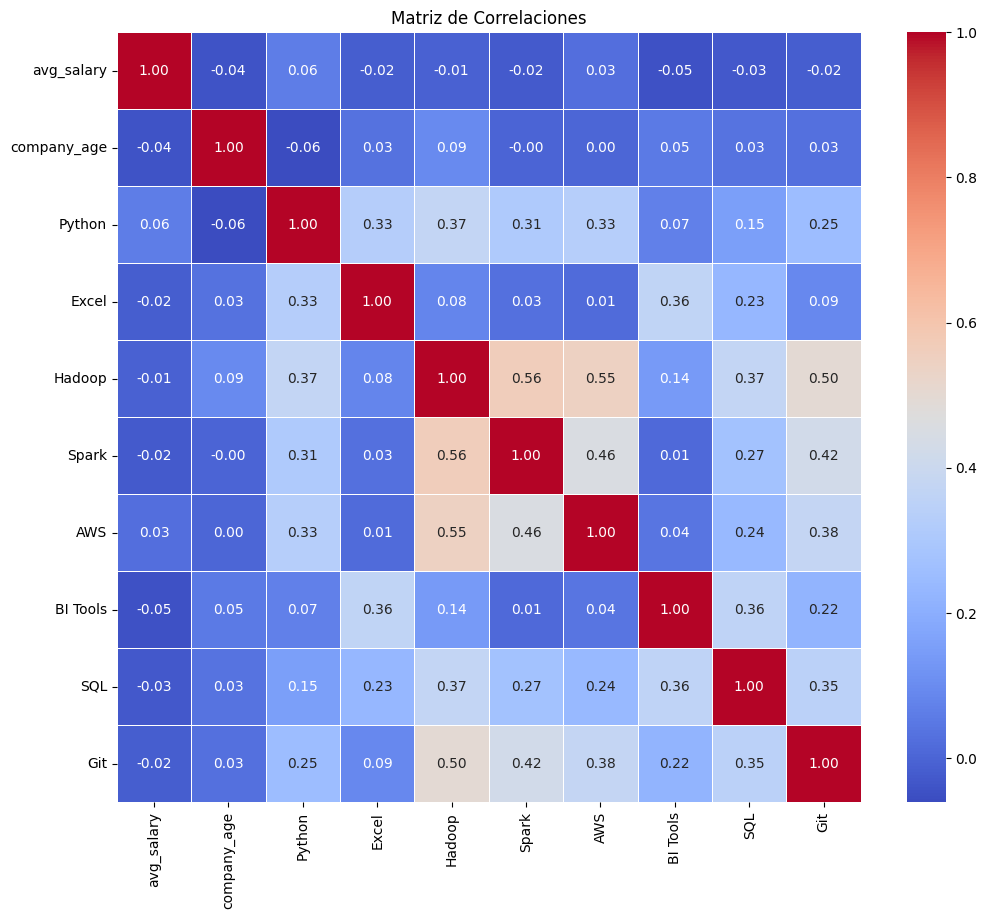

In [35]:
columnas_numericas = job_positions.select_dtypes(include=['number'])

matriz_correlaciones = columnas_numericas.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlaciones, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

A primera vista, parece que no existe una alta correlación entre las varibles numéricas de nuestro modelo. Tendremos que comprobar la correlación posteriormente cuando convirtamos nuestras variables categóricas a numéricas a lo largo del proceso de entrenamiento de los modelos de aprendizaje automático.

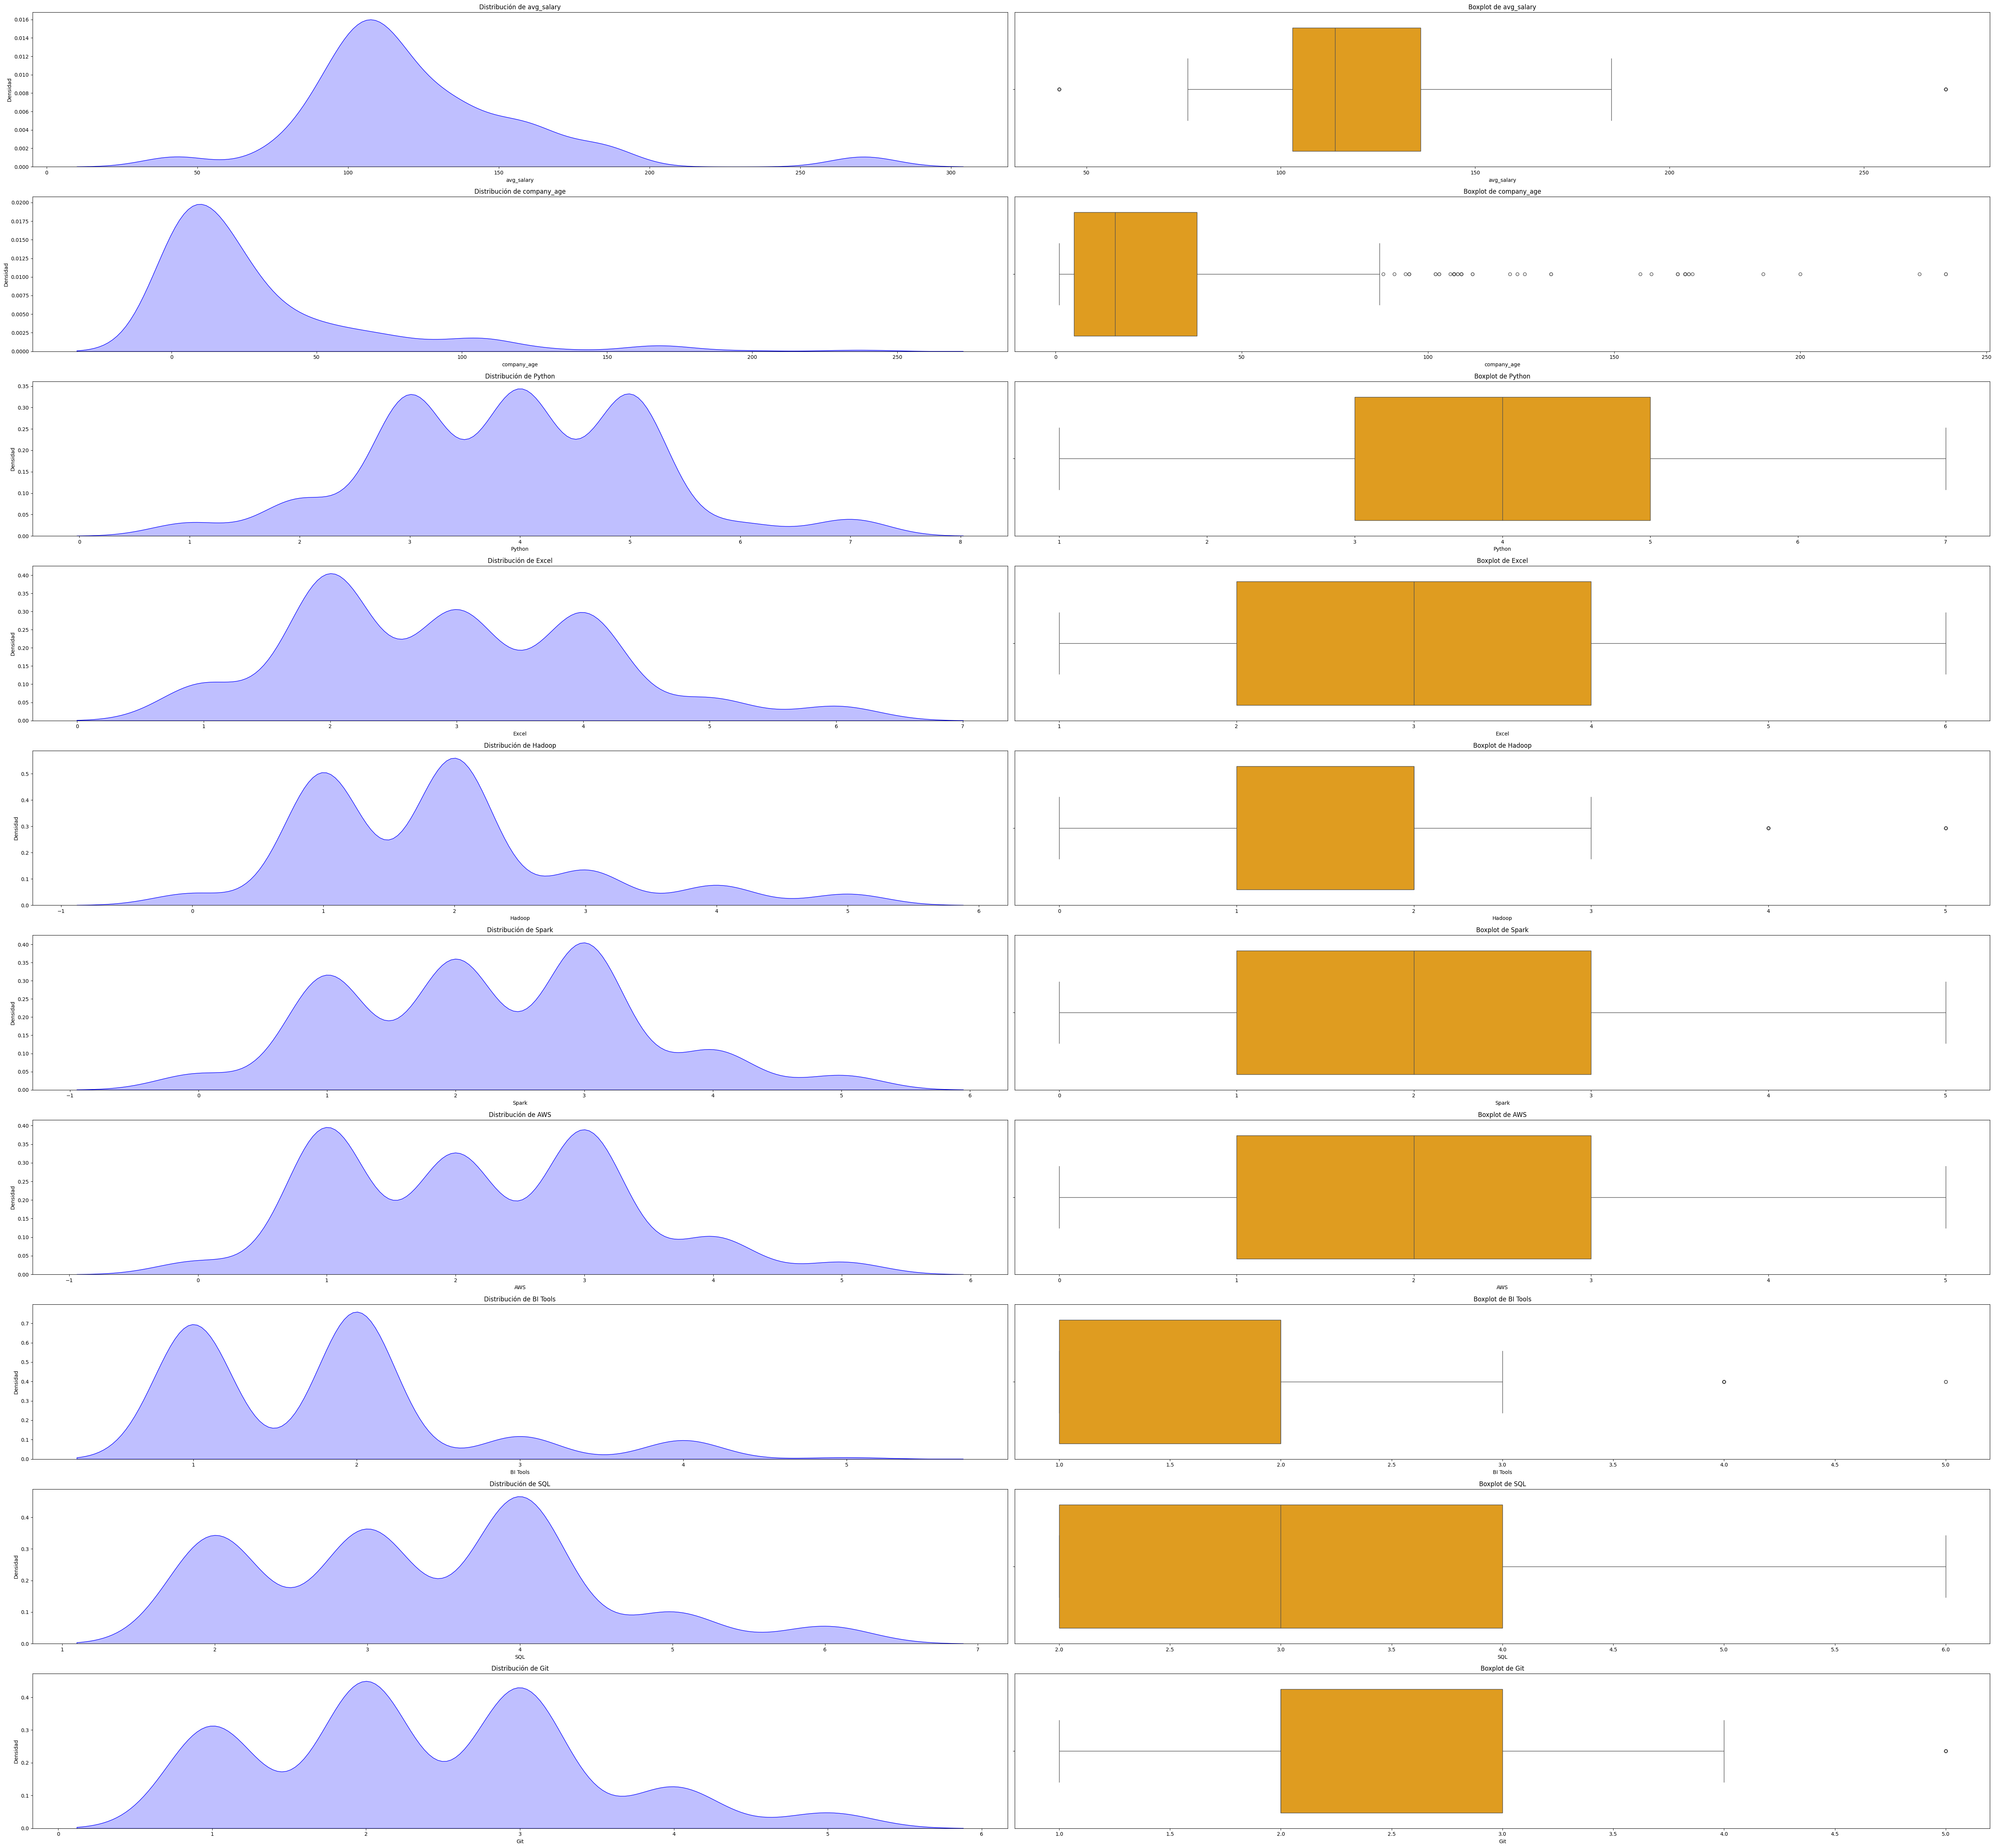

In [36]:
# Obtener las columnas numéricas de X
columns = columnas_numericas.columns

# Configurar el tamaño de las figuras
plt.figure(figsize=(54, 50))

# Crear subplots para cada columna numérica
for i, columna in enumerate(columns):
    # Diagrama de densidad (KDE)
    plt.subplot(len(columns), 2, 2 * i + 1)
    sns.kdeplot(columnas_numericas[columna], fill=True, color='blue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

    # Diagrama de caja (Boxplot)
    plt.subplot(len(columns), 2, 2 * i + 2)
    sns.boxplot(x=columnas_numericas[columna], color='orange')
    plt.title(f'Boxplot de {columna}')
    plt.xlabel(columna)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()

##### Guardamos finalmente nuestro dataset en un nuevo .csv

In [37]:
#job_positions.to_csv('./dataset/Cleaned_job_position_CLASSIFICATION.csv', index=False) 